In [1]:
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

np.set_printoptions(threshold=np.inf)

In [2]:
def coloring(cluster_assignments):
    """ Helper function to color graphs based on community detection results """
    
    color_map = []
    
    for i in range(len(cluster_assignments)):
        if cluster_assignments[i] == 0:
            color_map.append('red')
        elif cluster_assignments[i] == 1:
            color_map.append('green')
        elif cluster_assignments[i] == 2:
            color_map.append('yellow')
        else:
            color_map.append('grey')
            
    return color_map

# SCORE Implementation

In [3]:
def score(G, K):
    """ Takes in a graph G and applies SCORE for K communities"""

    print("\n----------------------------------------")
    print("\nOrder of Nodes in Adjacency Matrix:", list(G.nodes()))
    print("\n----------------------------------------")

    # Get the adjacency matrix A of G
    A = nx.adjacency_matrix(G).toarray()

    print("\nAdjacency Matrix:")
    print(A)
    print("\n----------------------------------------")

    # Compute the eigenvalues and unit-norm eigenvectors of A
    eigenvalues, eigenvectors = np.linalg.eig(A)

    # Get indices that would sort the absolute value of the eigenvalues of A in descending order
    sorted_indices = np.argsort(np.abs(eigenvalues))[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    print("\nLeading Eigenvectors:")
    print(sorted_eigenvectors[:, 0:K])
    print("\n----------------------------------------")

    n = G.number_of_nodes() # n is the number of nodes in G
    eta_1 = sorted_eigenvectors[:, 0]  # eta_1 is the first leading eigenvector
    
    # Initialize r
    r = np.zeros((n, K-1))  # n rows, K-1 columns
    
    # Populate r with the ratios between the first leading eigenvector and each of the other leading eigenvectors
    for k in range(K-1):
        r[:, k] = sorted_eigenvectors[:, k + 1] / eta_1
    
    print("\nr:")
    print(r)
    print("\n----------------------------------------")
    
    # Apply K-means to r
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(r)
    
    cluster_assignments = kmeans.labels_
    print("\nCluster Assignments:", cluster_assignments)
    print("\n----------------------------------------")
    return cluster_assignments

# Test Graph

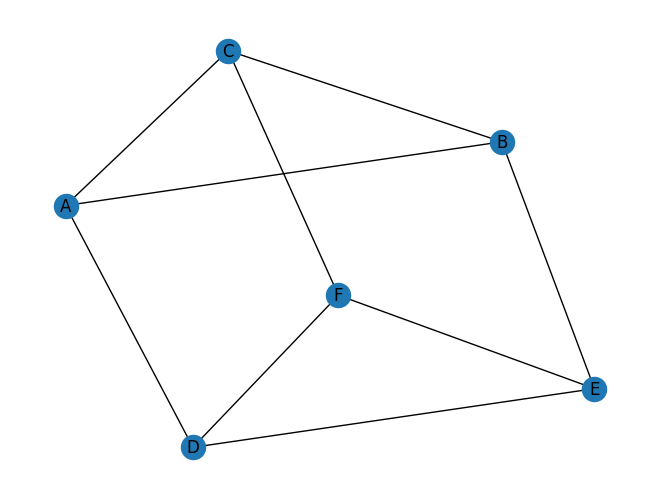

In [4]:
G = nx.Graph()
edgelist = [('A', 'B'), 
            ('A', 'C'), 
            ('B', 'C'), 
            ('D', 'E'), 
            ('D', 'F'), 
            ('E', 'F'), 
            ('A', 'D'), 
            ('B', 'E'), 
            ('C', 'F')]
G.add_edges_from(edgelist)
nx.draw(G, with_labels=True)

## $K=2$ Communities


----------------------------------------

Order of Nodes in Adjacency Matrix: ['A', 'B', 'C', 'D', 'E', 'F']

----------------------------------------

Adjacency Matrix:
[[0 1 1 1 0 0]
 [1 0 1 0 1 0]
 [1 1 0 0 0 1]
 [1 0 0 0 1 1]
 [0 1 0 1 0 1]
 [0 0 1 1 1 0]]

----------------------------------------

Leading Eigenvectors:
[[-0.40824829  0.57735027]
 [-0.40824829 -0.28867513]
 [-0.40824829 -0.28867513]
 [-0.40824829 -0.57735027]
 [-0.40824829  0.28867513]
 [-0.40824829  0.28867513]]

----------------------------------------

r:
[[-1.41421356]
 [ 0.70710678]
 [ 0.70710678]
 [ 1.41421356]
 [-0.70710678]
 [-0.70710678]]

----------------------------------------

Cluster Assignments: [1 0 0 0 1 1]

----------------------------------------


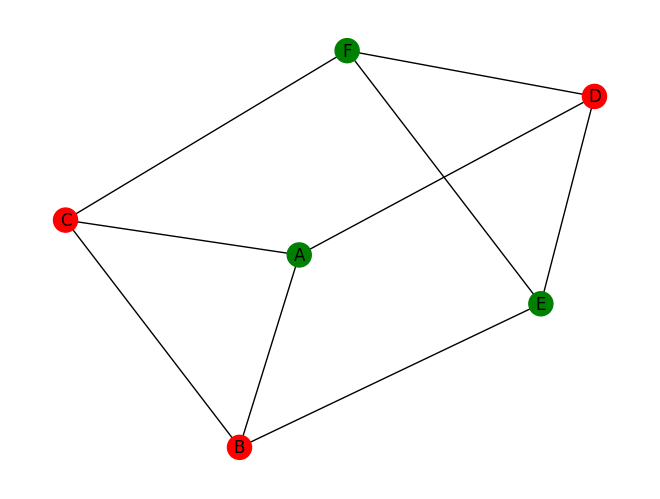

In [5]:
cluster_assignments = score(G, 2)
nx.draw(G, node_color=coloring(cluster_assignments), with_labels=True)

## $K=3$ Communities


----------------------------------------

Order of Nodes in Adjacency Matrix: ['A', 'B', 'C', 'D', 'E', 'F']

----------------------------------------

Adjacency Matrix:
[[0 1 1 1 0 0]
 [1 0 1 0 1 0]
 [1 1 0 0 0 1]
 [1 0 0 0 1 1]
 [0 1 0 1 0 1]
 [0 0 1 1 1 0]]

----------------------------------------

Leading Eigenvectors:
[[-0.40824829  0.57735027 -0.06984067]
 [-0.40824829 -0.28867513  0.53124857]
 [-0.40824829 -0.28867513 -0.46140789]
 [-0.40824829 -0.57735027  0.06984067]
 [-0.40824829  0.28867513 -0.53124857]
 [-0.40824829  0.28867513  0.46140789]]

----------------------------------------

r:
[[-1.41421356  0.17107402]
 [ 0.70710678 -1.30128791]
 [ 0.70710678  1.1302139 ]
 [ 1.41421356 -0.17107402]
 [-0.70710678  1.30128791]
 [-0.70710678 -1.1302139 ]]

----------------------------------------

Cluster Assignments: [2 0 1 1 2 0]

----------------------------------------


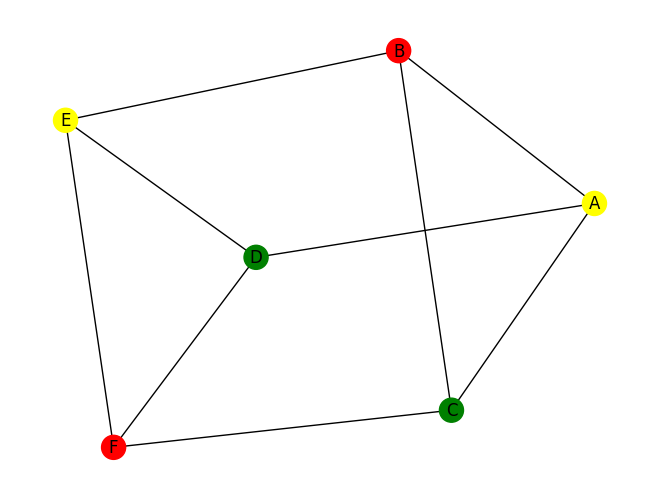

In [6]:
cluster_assignments = score(G, 3)
nx.draw(G, node_color=coloring(cluster_assignments), with_labels=True)

## $K=4$ Communities


----------------------------------------

Order of Nodes in Adjacency Matrix: ['A', 'B', 'C', 'D', 'E', 'F']

----------------------------------------

Adjacency Matrix:
[[0 1 1 1 0 0]
 [1 0 1 0 1 0]
 [1 1 0 0 0 1]
 [1 0 0 0 1 1]
 [0 1 0 1 0 1]
 [0 0 1 1 1 0]]

----------------------------------------

Leading Eigenvectors:
[[-0.40824829  0.57735027 -0.06984067  0.40824829]
 [-0.40824829 -0.28867513  0.53124857  0.40824829]
 [-0.40824829 -0.28867513 -0.46140789  0.40824829]
 [-0.40824829 -0.57735027  0.06984067 -0.40824829]
 [-0.40824829  0.28867513 -0.53124857 -0.40824829]
 [-0.40824829  0.28867513  0.46140789 -0.40824829]]

----------------------------------------

r:
[[-1.41421356  0.17107402 -1.        ]
 [ 0.70710678 -1.30128791 -1.        ]
 [ 0.70710678  1.1302139  -1.        ]
 [ 1.41421356 -0.17107402  1.        ]
 [-0.70710678  1.30128791  1.        ]
 [-0.70710678 -1.1302139   1.        ]]

----------------------------------------

Cluster Assignments: [0 2 0 1 3 1]

------

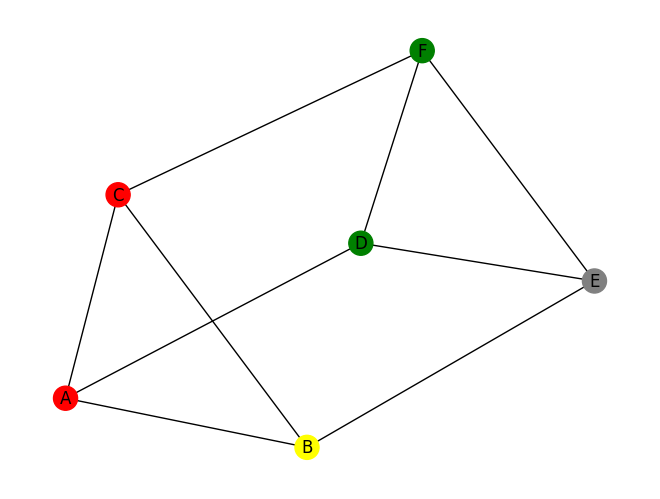

In [7]:
cluster_assignments = score(G, 4)
nx.draw(G, node_color=coloring(cluster_assignments), with_labels=True)

# Karate Club Graph

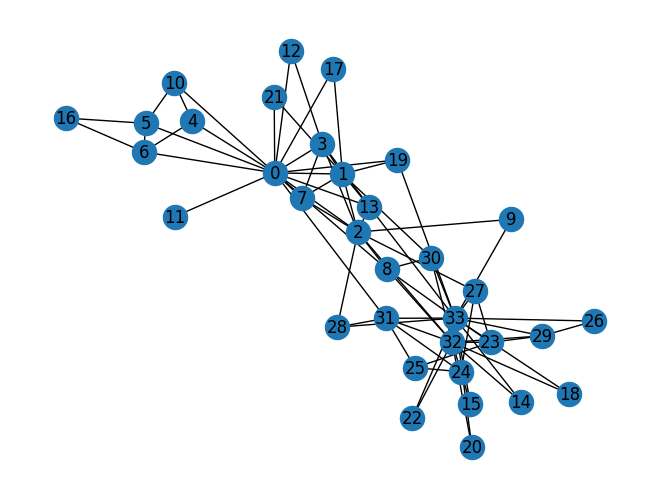

In [8]:
G = nx.karate_club_graph()
nx.draw(G, with_labels=True)

## $K=2$ Communities


----------------------------------------

Order of Nodes in Adjacency Matrix: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

----------------------------------------

Adjacency Matrix:
[[0 4 5 3 3 3 3 2 2 0 2 3 1 3 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 2 0 0]
 [4 0 6 3 0 0 0 4 0 0 0 0 0 5 0 0 0 1 0 2 0 2 0 0 0 0 0 0 0 0 2 0 0 0]
 [5 6 0 3 0 0 0 4 5 1 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 2 0]
 [3 3 3 0 0 0 0 3 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 2 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 5 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 2 5 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 4 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 4]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 3 3 0 0 0 0 0

/var/folders/c0/g_n_x78s1dz1_277vsz6_gnc0000gn/T/ipykernel_95801/46743842.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  r[:, k] = sorted_eigenvectors[:, k + 1] / eta_1


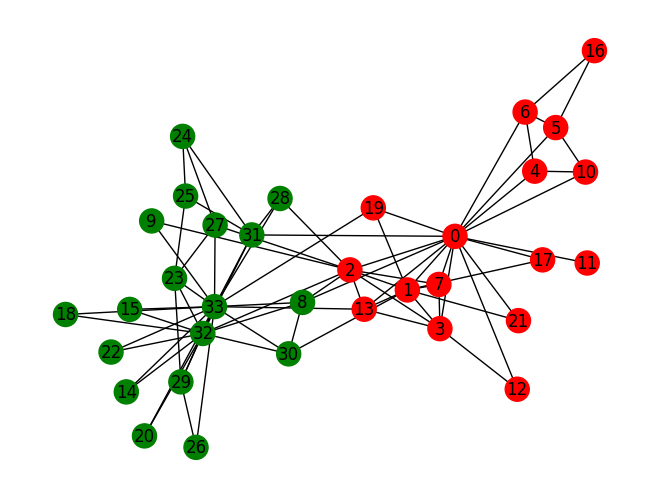

In [9]:
cluster_assignments = score(G, 2)
nx.draw(G, node_color=coloring(cluster_assignments), with_labels=True)

## $K=3$ Communities


----------------------------------------

Order of Nodes in Adjacency Matrix: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

----------------------------------------

Adjacency Matrix:
[[0 4 5 3 3 3 3 2 2 0 2 3 1 3 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 2 0 0]
 [4 0 6 3 0 0 0 4 0 0 0 0 0 5 0 0 0 1 0 2 0 2 0 0 0 0 0 0 0 0 2 0 0 0]
 [5 6 0 3 0 0 0 4 5 1 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 2 0]
 [3 3 3 0 0 0 0 3 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 2 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 5 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 2 5 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 4 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 4]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 3 3 0 0 0 0 0

/var/folders/c0/g_n_x78s1dz1_277vsz6_gnc0000gn/T/ipykernel_95801/46743842.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  r[:, k] = sorted_eigenvectors[:, k + 1] / eta_1


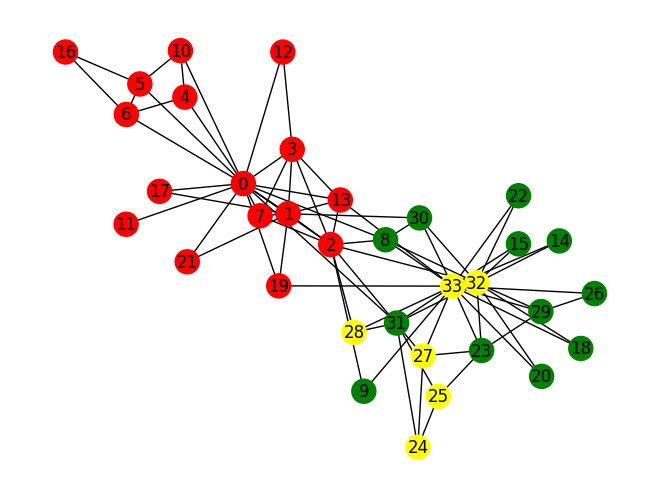

In [10]:
cluster_assignments = score(G, 3)
nx.draw(G, node_color=coloring(cluster_assignments), with_labels=True)

## $K=4$ Communities


----------------------------------------

Order of Nodes in Adjacency Matrix: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

----------------------------------------

Adjacency Matrix:
[[0 4 5 3 3 3 3 2 2 0 2 3 1 3 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 2 0 0]
 [4 0 6 3 0 0 0 4 0 0 0 0 0 5 0 0 0 1 0 2 0 2 0 0 0 0 0 0 0 0 2 0 0 0]
 [5 6 0 3 0 0 0 4 5 1 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 2 0]
 [3 3 3 0 0 0 0 3 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 2 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 5 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 2 5 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 4 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 4]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 3 3 0 0 0 0 0

/var/folders/c0/g_n_x78s1dz1_277vsz6_gnc0000gn/T/ipykernel_95801/46743842.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  r[:, k] = sorted_eigenvectors[:, k + 1] / eta_1


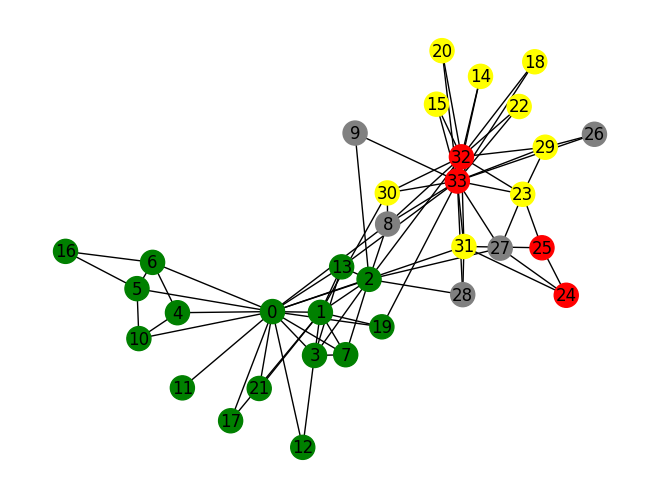

In [11]:
cluster_assignments = score(G, 4)
nx.draw(G, node_color=coloring(cluster_assignments), with_labels=True)